We will work through a time series forecasting project from end-to-end, from loading the dataset and defining the problem to training a final model and making predictions.

Set up the Environment
--
This project, assumes that you have installed and working with :
> SciPy

> NumPy

> Matplotlib

> Pandas

> scikit-learn

> statsmodels

In [1]:
# scipy
import scipy
print('scipy: %s' % scipy.__version__)
# numpy
import numpy
print('numpy: %s' % numpy.__version__)
# matplotlib
import matplotlib
print('matplotlib: %s' % matplotlib.__version__)
# pandas
import pandas
print('pandas: %s' % pandas.__version__)
# scikit-learn
import sklearn
print('sklearn: %s' % sklearn.__version__)
# statsmodels
import statsmodels
print('statsmodels: %s' % statsmodels.__version__)

scipy: 1.4.1
numpy: 1.18.0
matplotlib: 3.1.2
pandas: 0.25.3
sklearn: 0.22.1
statsmodels: 0.11.0


Problem Description
--
**The problem is to predict annual water usage.**

The dataset provides the annual water usage in Baltimore from 1885 to 1963, or 79 years of data.

In [4]:
from pandas import read_csv

series = read_csv('C:\Program Files/Python36/suven/Data Anaylsis/Dataset/yearly-water-usage.csv',index_col=0)

series.head()

,Water
Year,
1885,356
1886,386
1887,397
1888,397
1889,413


In [5]:
series.info()  # Note : Yearly data from 1885 to 1963

<class 'pandas.core.frame.DataFrame'>
Int64Index: 79 entries, 1885 to 1963
Data columns (total 1 columns):
Water    79 non-null int64
dtypes: int64(1)
memory usage: 1.2 KB


Test Harness
--

We must develop a test harness(*i.e a test data*) to investigate the data and evaluate candidate models.

This involves two steps:
1. Defining a Validation Dataset.

2. Developing a Method for Model Evaluation.

**1. Validation Dataset**

The dataset is not current. This means that we cannot easily collect updated data to validate the model.

Therefore, we will pretend that it is 1953 and withhold the last 10 years of data from analysis and model selection.

This final decade of data will be used to validate the final model.

The code below will load the dataset as a Pandas Series and split into two, one for model development (dataset.csv) and the other for validation (validation.csv).

In [7]:
from pandas import read_csv

split_point = len(series) - 10

dataset, validation = series[0:split_point], series[split_point:]
print('Dataset %d, Validation %d' % (len(dataset), len(validation)))

dataset.to_csv('C:\Program Files/Python36/suven/Data Anaylsis/Dataset/dataset.csv', index=False)
validation.to_csv('C:\Program Files/Python36/suven/Data Anaylsis/Dataset/validation.csv', index=False)

Dataset 69, Validation 10


The specific contents of these files are:
*dataset.csv: Observations from 1885 to 1953 (69 observations).*
*validation.csv: Observations from 1954 to 1963 (10 observations).*
**The validation dataset is about 12% of the original dataset.**



**2. Model Evaluation**

Model evaluation will only be performed on the data in *dataset.csv* prepared in the previous section.

Model evaluation involves two elements:

> 1. Performance Measure.

> 2. Test Strategy.

**2. 1 Performance Measure**

We will evaluate the performance of predictions using the **`root mean squared error (RMSE).`**

*This gives us a `baseline`, that the Model we make should atleast have less or equal to RMSE*

**schematic of the code :**

`from sklearn.metrics import mean_squared_error
from math import sqrt
...
test = ...
predictions = ...
mse = mean_squared_error(test, predictions)
rmse = sqrt(mse)
print('RMSE: %.3f' % rmse)`

2.2 **Test Strategy**

Candidate models will be evaluated using **`walk-forward validation.`** (*In walk-forward validation method each time step in the test dataset will be enumerated, a model constructed on history data, and the forecast compared to the expected value. The observation will then be added to the training dataset and the process repeated. Walk-Forward validation creates a **`rolling-forecast type`** model as well it is a realistic way to evaluate time series forecast models as one would expect models to be updated as new observations are made available.*)

A **`rolling-forecast type`** model is best for **Time series**. This is where one-step forecasts are needed given all available data.

The **walk-forward validation** will work as follows:

1. The first 50% of the dataset will be used to train the model.

2. The remaining 50% of the dataset will be iterated to test the model.

**`For each step in the test dataset:`** (see code sample below *first*)

1. A model will be trained.

2. A one-step prediction made and the prediction stored for later evaluation.

3. The actual observation from the test dataset will be added to the training dataset for the next iteration.

4. The predictions made during the enumeration of the test dataset will be evaluated and an RMSE score reported.

5. Given the small size of the data, we will allow a model to be re-trained given all available data prior to each prediction.

In [8]:
# prepare data. spliting into train and test set
X = series.values
X = X.astype('float32')
# Always convert a loaded dataset to float32 in case the loaded data 
# still has some String or Integer data types.

train_size = int(len(X) * 0.50)
train, test = X[0:train_size], X[train_size:]

**Baseline prediction or Persistance**

 Baseline prediction for time series forecasting is called the naive forecast, or persistence. This is where the observation from the current time step is used as the prediction for the observation at the next time step. (refer step 2.1 once )

In [9]:
from pandas import read_csv
from sklearn.metrics import mean_squared_error
from math import sqrt
import numpy as np

# load data
series = read_csv('C:\Program Files/Python36/suven/Data Anaylsis/Dataset/yearly-water-usage.csv', index_col=0)

# prepare data
X = series.values
X = X.astype('float32')
train_size = int(len(X) * 0.50)
train, test = X[0:train_size], X[train_size:]

# walk-forward validation
history = [x for x in train]
predictions = list()
for i in range(len(test)):
	# predict
	yhat = history[-1] # using the last i.e 69th record to predict 70th record
	predictions.append(yhat)

    # observation
	obs = test[i]
	history.append(obs)
	print('>Predicted= ' ,yhat, 'Expected= ', obs)

# report performance
mse = mean_squared_error(test, predictions)
rmse = sqrt(mse)
print('RMSE: %.3f' % rmse)

>Predicted=  [492.] Expected=  [503.]
>Predicted=  [503.] Expected=  [503.]
>Predicted=  [503.] Expected=  [450.]
>Predicted=  [450.] Expected=  [432.]
>Predicted=  [432.] Expected=  [432.]
>Predicted=  [432.] Expected=  [458.]
>Predicted=  [458.] Expected=  [462.]
>Predicted=  [462.] Expected=  [503.]
>Predicted=  [503.] Expected=  [488.]
>Predicted=  [488.] Expected=  [466.]
>Predicted=  [466.] Expected=  [492.]
>Predicted=  [492.] Expected=  [503.]
>Predicted=  [503.] Expected=  [515.]
>Predicted=  [515.] Expected=  [500.]
>Predicted=  [500.] Expected=  [522.]
>Predicted=  [522.] Expected=  [575.]
>Predicted=  [575.] Expected=  [583.]
>Predicted=  [583.] Expected=  [587.]
>Predicted=  [587.] Expected=  [628.]
>Predicted=  [628.] Expected=  [640.]
>Predicted=  [640.] Expected=  [609.]
>Predicted=  [609.] Expected=  [606.]
>Predicted=  [606.] Expected=  [632.]
>Predicted=  [632.] Expected=  [617.]
>Predicted=  [617.] Expected=  [613.]
>Predicted=  [613.] Expected=  [598.]
>Predicted= 

In this above case, we can see that the `persistence model` achieved an RMSE of 21.658. **This means that on average, the model was wrong by about 22 liters per capita per day for each prediction made.**

Check does data has trend and /or Seasonality ?
--
 The best way `to find the Trend or Seasonality`is to plot a Line graph,  of the time series dataset.
 
 Accordingly then we can check whether the data is **`STATIONARY` or not**.

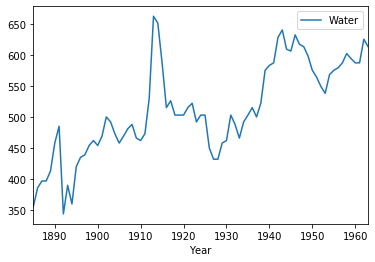

In [10]:
from pandas import read_csv
from matplotlib import pyplot

series.plot();
pyplot.show();



1. There looks to be an **increasing trend** in water usage over time.

2. There do not appear to be any obvious outliers, although there are some large fluctuations.

3. There is a downward trend for the periods 1915 to 1930, 1945 to 1955.

Analysis of the time series data assumes that we are working with a **stationary time series.** ( `as explained in NB 9_B` )

The time series is likely non-stationary. We can **`make it stationary by first differencing the series and using a statistical test to confirm that the result is stationary.`**

The example below creates a stationary version of the series and saves it to file stationary.csv.

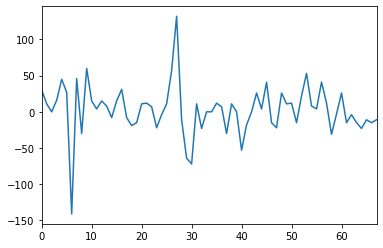

In [14]:
import pandas as pd 
from pandas import read_csv
from matplotlib import pyplot
 
series = read_csv('C:\Program Files/Python36/suven/Data Anaylsis/Dataset/dataset.csv')
X = series.values
X = X.astype('float32')

# Differencing data to make the time series stationary
# this would help us in reducing the trend
diff = list()
for i in range(1, len(X)):
    value = X[i] - X[i - 1]
    diff.append(value)

stationary = pd.DataFrame(diff)
#stationary.dropna();
# stationary = stationary[1:]

# plot differenced data
stationary.plot(legend=False)
pyplot.show();

# save
stationary.to_csv('C:\Program Files/Python36/suven/Data Anaylsis/Dataset/stationary.csv', index=False)

In [97]:
from statsmodels.tsa.stattools import adfuller

# check for Stationarity
X = stationary.iloc[:,0].values
#print(X) 
result = adfuller(X)

print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
print('Critical Values:' ,result[4])

ADF Statistic: -6.055566
p-value: 0.000000
Critical Values:
Critical Values: {'1%': -3.5352168748293127, '5%': -2.9071540828402367, '10%': -2.5911025443786984}


Running the example outputs the result of a statistical significance test of whether the differenced series is stationary or not. Here we used, the most popular statistical test : `augmented Dickey-Fuller test`.

The results show that the **test statistic value -6.055566 is smaller than the critical value at 1% of -3.535**. This suggests that we can reject the null hypothesis with a significance level of less than 1%. or Accept the Alternate Hypothesis with 99% confidence.

**`Remember`**
--
The null hypothesis of the test is that the time series can be represented by a unit root, that it is not stationary (has some time-dependent structure). The alternate hypothesis (rejecting the null hypothesis) is that the time series is stationary.

**Null Hypothesis (H0)**: If failed to be rejected, it suggests the time series has a unit root, meaning it is non-stationary. It has some time dependent structure.

**Alternate Hypothesis (H1)**: The null hypothesis is rejected; it suggests the time series does not have a unit root, meaning it is stationary. It does not have time-dependent structure.

We interpret this result using the p-value from the test. A p-value below a threshold (such as 5% or 1%) suggests we reject the null hypothesis (stationary), otherwise a p-value above the threshold suggests we fail to reject the null hypothesis (non-stationary). 

***Examples***

> p-value > 0.05: Fail to reject the null hypothesis (H0), the data has a unit root and is non-stationary.

> p-value <= 0.05: Reject the null hypothesis (H0), the data does not have a unit root and is stationary.

**Learning and Applying ARIMA Model. As well doing the necessary Model validation is covered in `9_D_Time_Series_Forecasting_Problem_Solving`.**